# Project 2: Analyzing IMDb Data


For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [7]:
pwd

'C:\\Users\\Mike Osberg\\Documents\\General Assembly (Data Science)\\p_ds_course_projects'

In [2]:
movies = pd.read_csv('project2_data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [13]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [21]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [26]:
# Answer:
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [27]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

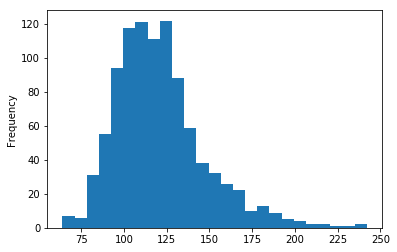

In [31]:
# Answer:
movie_len_hist = movies.loc[:,'duration'].plot(kind='hist',bins = 25)

#### Use a box plot to display that same data.

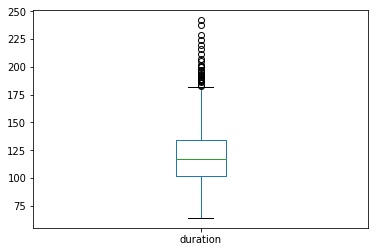

In [32]:
# Answer:
movie_len_box = movies.loc[:,'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [50]:
# Answer:
ratings_count = movies.loc[:,'content_rating'].value_counts(ascending = True)
ratings_count

TV-MA          1
GP             3
X              4
NC-17          7
PASSED         7
G             32
UNRATED       38
APPROVED      47
NOT RATED     65
PG           123
PG-13        189
R            460
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'Movie Rating')

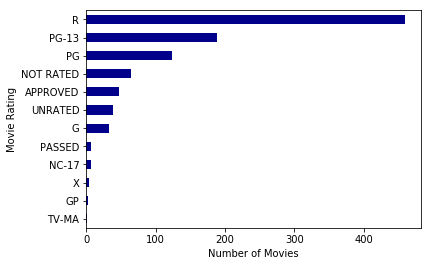

In [57]:
# Answer:
ratings_count_viz = ratings_count.plot(kind = 'barh', color='darkblue')
ratings_count_viz.set_xlabel("Number of Movies")
ratings_count_viz.set_ylabel("Movie Rating")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
new_ratings = movies.loc[:,'content_rating'].replace(["NOT RATED", "APPROVED","PASSED","GP"],"UNRATED")


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [17]:
# Answer:
new_ratings = movies.loc[:,'content_rating'].replace(["X","TV-MA"],"NC-17")

#### Count the number of missing values in each column.

In [11]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [19]:
# Answer:
movies.loc[movies.loc[:, 'content_rating'].isnull(), :]
new_ratings = movies.loc[:,'content_rating'].replace(['NaN'],"OLD")


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [55]:
# Answer: 
long_movies = movies.loc[movies.loc[:,"duration"] >= 120,:]
short_movies =movies.loc[movies.loc[:,"duration"] <120,:]


print("The average star rating of long movies is", long_movies.loc[:,'star_rating'].mean(), "stars.")
print("The average star rating of short movies is", short_movies.loc[:,'star_rating'].mean(), "stars.")

The average star rating of long movies is 7.948898678414082 stars.
The average star rating of short movies is 7.838666666666657 stars.


#### Use a visualization to detect whether there is a relationship between duration and star rating.

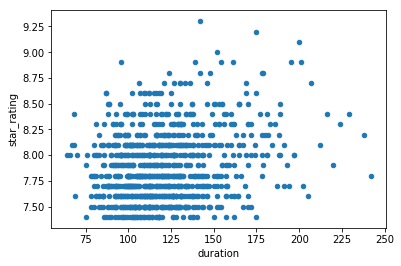

In [65]:
# Answer:

ax = movies.plot(kind = "scatter", x = "duration", y = "star_rating")

#### Calculate the average duration for each genre.

In [47]:
# Answer:
movies.groupby('genre')['duration'].mean()


genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

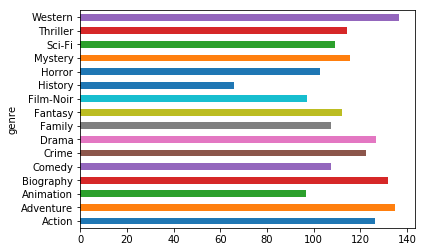

In [59]:
# Answer:
#drinks_nobooz = drinks.drop('liters_alcohol', axis = 'columns').groupby('continent').mean().plot(kind = 'bar')

ax = movies.groupby('genre')['duration'].mean().plot(kind='barh')


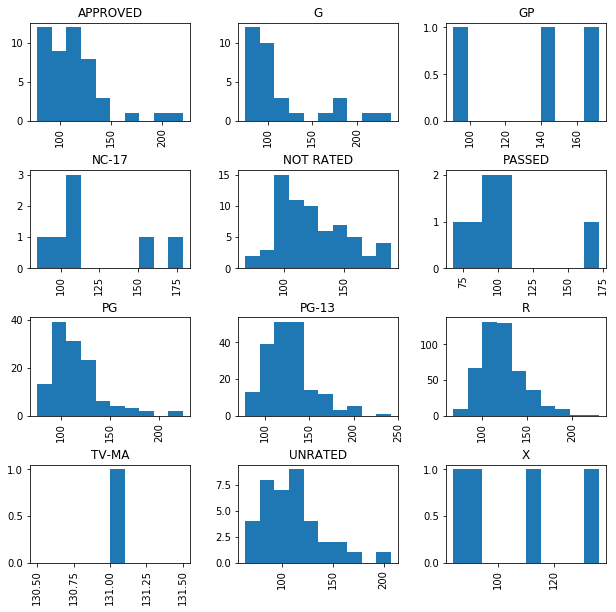

In [60]:
ax = movies.hist(column = 'duration', by = 'content_rating', figsize = (10,10))

#### Determine the top rated movie (by star rating) for each genre.

In [93]:
# Answer:
movie_stars = movies.groupby(['genre','title'])['star_rating'].max().sort_values(ascending=False)
movie_stars


genre      title                                            
Crime      The Shawshank Redemption                             9.3
           The Godfather                                        9.2
           The Godfather: Part II                               9.1
Action     The Dark Knight                                      9.0
Adventure  The Lord of the Rings: The Return of the King        8.9
Western    The Good, the Bad and the Ugly                       8.9
Biography  Schindler's List                                     8.9
Crime      Pulp Fiction                                         8.9
Drama      Fight Club                                           8.9
           12 Angry Men                                         8.9
           Forrest Gump                                         8.8
Adventure  The Lord of the Rings: The Two Towers                8.8
Action     Inception                                            8.8
Adventure  The Lord of the Rings: The Fellowship of the

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [102]:
# Answer:
print(movies.loc[movies.loc[:,'title'].duplicated(),:])
print(movies.loc[movies.loc[:,'title'] == "The Girl with the Dragon Tattoo" ,:])
print(movies.loc[movies.loc[:,'title'] == "Dracula" ,:])
print(movies.loc[movies.loc[:,'title'] == "Le Miserables" ,:])
print(movies.loc[movies.loc[:,'title'] == "True Grit" ,:])

     star_rating                            title content_rating      genre  \
482          7.8  The Girl with the Dragon Tattoo              R      Crime   
905          7.5                          Dracula              R     Horror   
924          7.5                   Les Miserables          PG-13      Crime   
936          7.4                        True Grit            NaN  Adventure   

     duration                                        actors_list  
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...  
905       128  [u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...  
924       134  [u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...  
936       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']  
     star_rating                            title content_rating  genre  \
466          7.9  The Girl with the Dragon Tattoo              R  Crime   
482          7.8  The Girl with the Dragon Tattoo              R  Crime   

     duration                              

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [159]:
# Answer:
genre_count=movies.loc[:,"genre"].value_counts()
big10genres = genre_count.loc[genre_count >9]
big10_list=big10genres.index.tolist()
mean_genre = movies.groupby('genre')['star_rating'].mean()
mean_genre.loc[big10_list]


genre
Drama        7.902518
Comedy       7.822436
Action       7.884559
Crime        7.916935
Biography    7.862338
Adventure    7.933333
Animation    7.914516
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!